# Sentiment Analysis with ParsBERT

## The NVIDIA System Management Interface (nvidia-smi) is a command line utility, based on top of the NVIDIA Management Library (NVML), intended to aid in the management and monitoring of NVIDIA GPU devices.

In [1]:
!nvidia-smi

Tue Jun 14 18:30:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install & import Libraries

In [2]:
# Import required packages (If You Need Any More Packages, You Can Add them HERE.)

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import plotly.graph_objects as go

from tqdm.notebook import tqdm

import os
import re
import collections

## Dataset

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

data1 = pd.read_csv('/content/drive/MyDrive/project-3/taghche_5000.csv', encoding='utf-8')
data1.head()

,date,comment,bookname,rate,bookID,like
0,1395/11/14,اسم کتاب No one writes to the Colonel\nترجمش...,سرهنگ کسی ندارد برایش نامه بنویسد,0,3,2
1,1395/11/14,"طاقچه عزیز،نام کتاب""کسی به سرهنگ نامه نمینویسد...",سرهنگ کسی ندارد برایش نامه بنویسد,5,3,2
2,1394/06/06,بنظرم این اثر مارکز خیلی از صد سال تنهایی که ب...,سرهنگ کسی ندارد برایش نامه بنویسد,5,3,0
3,1393/09/02,به نظر کتاب خوبی میومد اما من از ترجمش خوشم نی...,سرهنگ کسی ندارد برایش نامه بنویسد,2,3,0
4,1393/06/29,کتاب خوبی است,سرهنگ کسی ندارد برایش نامه بنویسد,3,3,0


### Load the data

In [5]:

data = pd.read_csv('/content/drive/MyDrive/project-3/taghche_5000.csv', encoding='utf-8')
data = data[['comment', 'rate']]
data.head()

,comment,rate
0,اسم کتاب No one writes to the Colonel\nترجمش...,0
1,"طاقچه عزیز،نام کتاب""کسی به سرهنگ نامه نمینویسد...",5
2,بنظرم این اثر مارکز خیلی از صد سال تنهایی که ب...,5
3,به نظر کتاب خوبی میومد اما من از ترجمش خوشم نی...,2
4,کتاب خوبی است,3


In [6]:
# handle some conflicts with the dataset structure
# you can find a reliable solution, for the sake of the simplicity
# I just remove these bad combinations!
data['rate'] = data['rate'].apply(lambda r: r if r < 6 else None)

data = data.dropna(subset=['rate'])
data = data.dropna(subset=['comment'])
data = data.drop_duplicates(subset=['comment'], keep='first')
data = data.reset_index(drop=True)

### Normalization / Preprocessing

**<font color=red> For simplicity, Transform the rate in a range of 0.0 to 5.0 to a binary form of negative (0) or positive (1) with a threshold. If the rate is less than 3.0, it labeled as negative otherwise specified as positive.</font>**

In [8]:
##############################################################################################
#                                       Your Code                                            #
##############################################################################################

In [9]:
text = data["comment"]
import re

pattern = re.compile('\S*@\S*\s?')
cleaning = []
# pattern.sub('', s) 
# print(text) # with emoji
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

for item in text:
    # print(item)
    ss = remove_emojis(item)
    print(item)
    # s3 = pattern.sub('', s3) 
    print(ss)

Streaming output truncated to the last 5000 lines.
واقعاً احسنت بر آقای سرشار.. عالی بود.. خداقوت.
واقعاً احسنت بر آقای سرشار.. عالی بود.. خداقوت.
فوق العاده بود.
یک کتاب خوندنی...
برای من که مثل یک لیوان آب خنک تو تشنگی تابستون بود،،،همونقدر گوارا...
نمی دونم برای بقیه هم اینطور بوده یا نه،ولی تصور من از پیامبر یه مرد با لباس عربی یک دست سفید بود،یک فرد مقدس،خیلی نسبت بهشون حس محبت نداشتم،بیشتر حالت احترام و تقدس...
ولی با خوندن این کتاب پیامبر برای من یک شخصیت انسان گونه(جدای از اون حالت تقدس و فرشته مانند) پیدا کردند،شخصیتی که مثل همه آدما یه سری نیاز ها دارن،یه سری دغدغه ها دارن...
حسی که کتاب از پیامبر و خانواده و اطرافیانشون ایجاد کرد به هیچ وجه با فیلم «محمد رسول الله(ص)» برای من ایجاد نشد،و اون حجم از اتفاقات ماورایی فیلم هم در کتاب نبود.
کتاب از قبل از تولد پیامبر و از زندگی عبدالمطب پدربزرگ پیامبر آغاز میشه و تا زمان مبعث پیامبر پیش میره،نثر کتاب به زبان فارسی کهنه(ولی کاملاً قابل فهم و بسیار شیرین),گاهی اتفاق ها از زبان نویسنده است گاهی از زبان اطرافیان پیامبر،گاهی هم روند د

**<font color=red> Cleaning is the final step in this section. Your cleaned method should be included these steps:</font>**

**<font color=red>- fixing unicodes</font>**

**<font color=red>- removing specials like a phone number, email, url, new lines, ...</font>**

**<font color=red>- cleaning HTMLs</font>**

**<font color=red>- normalizing</font>**

**<font color=red>- removing emojis</font>**

**<font color=red>- removing extra spaces, hashtags</font>**

In [10]:

!pip install hazm
!pip install -q transformers
!pip install -q hazm
!pip install -q clean-text[gpl]

import hazm
from cleantext import clean

def cleaning(text):
    text = text.strip()

    ##############################################################################################
    #                                       Your Code                                            #
    ##############################################################################################
    # regular cleaning
    text = clean(text,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=True,
        no_punct=False,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="",
    )

    # cleaning htmls

    cleanr = re.compile('<.*?>')
    text = re.sub(cleanr, '', text)
    
    # normalizing


    normalizer = hazm.Normalizer()
    text = normalizer.normalize(text)
    
    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        # u"\u200c"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)
    
    text = wierd_pattern.sub(r'', text)
    
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    
    return text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 5.2 MB/s 
     |████████████████████████████████| 233 kB 46.4 MB/s 
     |████████████████████████████████| 1.4 MB 39.1 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394489 sha256=129df1e822745e01ca10f82cd3bc071a1cacc8977fba53e4d5207830e9a87b18
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154994 sha256=bcbc8399d5c96a95134805fda773a62dfd4530adf8f8df22026141964bdf8dcc
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
     |██████████████████████

In [11]:

# cleaning comments
data['cleaned_comment'] = data['comment'].apply(cleaning)

**<font color=red> Calculate the Length of Comments based on their Words</font>**

In [12]:
##############################################################################################
#                                       Your Code                                            #
##############################################################################################
data['cleaned_comment_len_by_words'] = data['cleaned_comment'].apply(lambda t: len(hazm.word_tokenize(t)))

**<font color=red> Remove Comments with the Length of Fewer than 3 Words & More than 256 Words</font>**

In [13]:
##############################################################################################
#                                       Your Code                                            #
##############################################################################################
minlim = 3
maxlim = 256
# remove comments with the length of fewer than three words
data['cleaned_comment_len_by_words'] = data['cleaned_comment_len_by_words'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else len_t)
data = data.dropna(subset=['cleaned_comment_len_by_words'])
data = data.reset_index(drop=True)

data.head()

,comment,rate,cleaned_comment,cleaned_comment_len_by_words
0,اسم کتاب No one writes to the Colonel\nترجمش...,0,اسم کتاب no one writes to the colonel ترجمش می...,47
1,"طاقچه عزیز،نام کتاب""کسی به سرهنگ نامه نمینویسد...",5,طاقچه عزیز، نام کتاب «کسی به سرهنگ نامه نمینوی...,20
2,بنظرم این اثر مارکز خیلی از صد سال تنهایی که ب...,5,بنظرم این اثر مارکز خیلی از صد سال تنهایی که ب...,45
3,به نظر کتاب خوبی میومد اما من از ترجمش خوشم نی...,2,به نظر کتاب خوبی میومد اما من از ترجمش خوشم نی...,20
4,کتاب خوبی است,3,کتاب خوبی است,3


In [14]:
def rate_to_label(rate, threshold=3.0):
    if rate <= threshold:
        return "0"
    else:
        return "1"


data['label'] = data['rate'].apply(lambda t: rate_to_label(t, 3.0))
labels = list(sorted(data['label'].unique()))
data.head()

,comment,rate,cleaned_comment,cleaned_comment_len_by_words,label
0,اسم کتاب No one writes to the Colonel\nترجمش...,0,اسم کتاب no one writes to the colonel ترجمش می...,47,0
1,"طاقچه عزیز،نام کتاب""کسی به سرهنگ نامه نمینویسد...",5,طاقچه عزیز، نام کتاب «کسی به سرهنگ نامه نمینوی...,20,1
2,بنظرم این اثر مارکز خیلی از صد سال تنهایی که ب...,5,بنظرم این اثر مارکز خیلی از صد سال تنهایی که ب...,45,1
3,به نظر کتاب خوبی میومد اما من از ترجمش خوشم نی...,2,به نظر کتاب خوبی میومد اما من از ترجمش خوشم نی...,20,0
4,کتاب خوبی است,3,کتاب خوبی است,3,0


In [15]:
data = data[['cleaned_comment', 'label']]
data.columns = ['comment', 'label']
data.head()

,comment,label
0,اسم کتاب no one writes to the colonel ترجمش می...,0
1,طاقچه عزیز، نام کتاب «کسی به سرهنگ نامه نمینوی...,1
2,بنظرم این اثر مارکز خیلی از صد سال تنهایی که ب...,1
3,به نظر کتاب خوبی میومد اما من از ترجمش خوشم نی...,0
4,کتاب خوبی است,0


### Handling Unbalanced Data

**<font color=red> Because the Data is Unbalanced, You should Balance it. Before & After Balancing Data, You should Plot a Bar Chart of Distribution of label within comments [DATA]</font>**

In [16]:
##############################################################################################
#                                       Your Code                                            #
##############################################################################################
fig = go.Figure()

groupby_label = data.groupby('label')['label'].count()

fig.add_trace(go.Bar(
    x=list(sorted(groupby_label.index)),
    y=groupby_label.tolist(),
    text=groupby_label.tolist(),
    textposition='auto'
))

fig.update_layout(
    title_text='Distribution of label within comments [DATA]',
    xaxis_title_text='Label',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

In [17]:
negative_data = data[data['label'] == "0"]
positive_data = data[data['label'] == "1"]

cutting_point = min(len(negative_data), len(positive_data))

if cutting_point <= len(negative_data):
    negative_data = negative_data.sample(n=cutting_point).reset_index(drop=True)

if cutting_point <= len(positive_data):
    positive_data = positive_data.sample(n=cutting_point).reset_index(drop=True)

new_data = pd.concat([negative_data, positive_data])
new_data = new_data.sample(frac=1).reset_index(drop=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2492 non-null   object
 1   label    2492 non-null   object
dtypes: object(2)
memory usage: 39.1+ KB


In [18]:
fig = go.Figure()

groupby_label = new_data.groupby('label')['label'].count()

fig.add_trace(go.Bar(
    x=list(sorted(groupby_label.index)),
    y=groupby_label.tolist(),
    text=groupby_label.tolist(),
    textposition='auto'
))

fig.update_layout(
    title_text='Distribution of label within comments [NEW DATA]',
    xaxis_title_text='Label',
    yaxis_title_text='Frequency',
    bargap=0.2,
    bargroupgap=0.2)

fig.show()

## Train,Validation,Test split

To achieve a globalized model, we need to split the cleaned dataset into train, valid, test sets due to size of the data. In this tutorial, I have considered a rate of **0.1** for both *valid*, *test* sets. For splitting, I use `train_test_split` provided by Sklearn package with stratifying on the label for preserving the distribution balance.

In [19]:
new_data['label_id'] = new_data['label'].apply(lambda t: labels.index(t))

train, test = train_test_split(new_data, test_size=0.1, random_state=1, stratify=new_data['label'])
train, valid = train_test_split(train, test_size=0.1, random_state=1, stratify=train['label'])

train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train, y_train = train['comment'].values.tolist(), train['label_id'].values.tolist()
x_valid, y_valid = valid['comment'].values.tolist(), valid['label_id'].values.tolist()
x_test, y_test = test['comment'].values.tolist(), test['label_id'].values.tolist()

print(train.shape)
print(valid.shape)
print(test.shape)

(2017, 3)
(225, 3)
(250, 3)


![BERT INPUTS](https://res.cloudinary.com/m3hrdadfi/image/upload/v1595158991/kaggle/bert_inputs_w8rith.png)

As you may know, the BERT model input is a combination of 3 embeddings.
- Token embeddings: WordPiece token vocabulary (WordPiece is another word segmentation algorithm, similar to BPE)
- Segment embeddings: for pair sentences [A-B] marked as $E_A$ or $E_B$ mean that it belongs to the first sentence or the second one.
- Position embeddings: specify the position of words in a sentence

## PyTorch

In [20]:
# Import required packages (If You Need Any More Packages, You Can Add them HERE.)

import torch
import torch.nn as nn
import torch.nn.functional as F

### Configuration

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda:0
CUDA is available!  Training on GPU ...


In [22]:
# general config
MAX_LEN = 128
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16

EPOCHS = 10
EEVERY_EPOCH = 1000
LEARNING_RATE = 2e-5
CLIP = 0.0

OUTPUT_PATH = '/content/bert-fa-base-uncased-sentiment-taaghceh/pytorch_model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [23]:
# create a key finder based on label 2 id and id to label

label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'0': 0, '1': 1}
id2label: {0: '0', 1: '1'}


**<font color=red> Setup the Tokenizer and Configuration</font>**

In [24]:
##############################################################################################
#                                       Your Code                                            #
##############################################################################################
MODEL_NAME_OR_PATH = 'HooshvareLab/bert-fa-base-uncased'
from transformers import BertConfig, BertTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME_OR_PATH)
config = BertConfig.from_pretrained(
    MODEL_NAME_OR_PATH, **{
        'label2id': label2id,
        'id2label': id2label,
    })

print(config.to_json_string())

Downloading:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440 [00:00<?, ?B/s]

{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "0",
    "1": "1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "0": 0,
    "1": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



### Input Embeddings

### Dataset

In [25]:
class TaaghcheDataset(torch.utils.data.Dataset):
    """ Create a PyTorch dataset for Taaghche. """

    def __init__(self, tokenizer, comments, targets=None, label_list=None, max_len=128):
        self.comments = comments
        self.targets = targets
        self.has_target = isinstance(targets, list) or isinstance(targets, np.ndarray)

        self.tokenizer = tokenizer
        self.max_len = max_len

        
        self.label_map = {label: i for i, label in enumerate(label_list)} if isinstance(label_list, list) else {}
    
    def __len__(self):
        return len(self.comments)

    def __getitem__(self, item):
        comment = str(self.comments[item])

        if self.has_target:
            target = self.label_map.get(str(self.targets[item]), str(self.targets[item]))

        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt')
        
        inputs = {
            'comment': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
        }

        if self.has_target:
            inputs['targets'] = torch.tensor(target, dtype=torch.long)
        
        return inputs


def create_data_loader(x, y, tokenizer, max_len, batch_size, label_list):
    dataset = TaaghcheDataset(
        comments=x,
        targets=y,
        tokenizer=tokenizer,
        max_len=max_len, 
        label_list=label_list)
    
    return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [26]:
label_list = ['0', '1']
train_data_loader = create_data_loader(train['comment'].to_numpy(), train['label'].to_numpy(), tokenizer, MAX_LEN, TRAIN_BATCH_SIZE, label_list)
valid_data_loader = create_data_loader(valid['comment'].to_numpy(), valid['label'].to_numpy(), tokenizer, MAX_LEN, VALID_BATCH_SIZE, label_list)
test_data_loader = create_data_loader(test['comment'].to_numpy(), None, tokenizer, MAX_LEN, TEST_BATCH_SIZE, label_list)

### Model

**<font color=red> Complete forward function</font>**

In [27]:
class SentimentModel(nn.Module):

    def __init__(self, config):
        super(SentimentModel, self).__init__()

        self.bert = BertModel.from_pretrained(MODEL_NAME_OR_PATH)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    
    def forward(self, input_ids, attention_mask, token_type_ids):
        ##############################################################################################
        #                                       Your Code                                            #
        ##############################################################################################
        # print(input_ids)
        _, pooled_output = self.bert(
            input_ids=input_ids, 
            attention_mask=attention_mask, 
            token_type_ids=token_type_ids, return_dict=False)
        
        print(type(pooled_output))
        # pooled_output = torch.as_tensor(pooled_output)
        # pooled_output = self.dropout(pooled_output)
        print(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

In [28]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()
pt_model = None

!nvidia-smi

Tue Jun 14 18:33:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
pt_model = SentimentModel(config=config)
pt_model = pt_model.to(device)

print('pt_model', type(pt_model))

Downloading:   0%|          | 0.00/624M [00:00<?, ?B/s]

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


pt_model <class '__main__.SentimentModel'>


### Training

**<font color=red> Complete functions</font>**

In [30]:
from sklearn.metrics import f1_score


def acc_and_f1(y_true, y_pred, average='weighted'):
    # Define Accuracy and F1-score
    ##############################################################################################
    #                                       Your Code                                            #
    ##############################################################################################
    acc = (y_true == y_pred).mean()
    f1 = f1_score(y_true=y_true, y_pred=y_pred, average=average)
    return {
        "acc": acc,
        "f1": f1,
    }

def y_loss(y_true, y_pred, losses):
    y_true = torch.stack(y_true).cpu().detach().numpy()
    y_pred = torch.stack(y_pred).cpu().detach().numpy()
    y = [y_true, y_pred]
    loss = np.mean(losses)

    return y, loss


def eval_op(model, data_loader, loss_fn):
    model.eval()

    losses = []
    y_pred = []
    y_true = []

    with torch.no_grad():
        for dl in tqdm(data_loader, total=len(data_loader), desc="Evaluation... "):

            # Define input_ids, attention_mask, token_type_ids, targets
            ##############################################################################################
            #                                       Your Code                                            #
            ##############################################################################################
            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']
            targets = dl['targets']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            targets = targets.to(device)

            # compute predicted outputs by passing inputs to the model
            ##############################################################################################
            #                                       Your Code                                            #
            ##############################################################################################
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)
            
            # convert output probabilities to predicted class
            ##############################################################################################
            #                                       Your Code                                            #
            ##############################################################################################
            _, preds = torch.max(outputs, dim=1)

            # calculate the batch loss
            ##############################################################################################
            #                                       Your Code                                            #
            ##############################################################################################
            loss = loss_fn(outputs, targets)

            # accumulate all the losses
            losses.append(loss.item())

            y_pred.extend(preds)
            y_true.extend(targets)
    
    eval_y, eval_loss = y_loss(y_true, y_pred, losses)
    return eval_y, eval_loss


def train_op(model, 
             data_loader, 
             loss_fn, 
             optimizer, 
             scheduler, 
             step=0, 
             print_every_step=100, 
             eval=False,
             eval_cb=None,
             eval_loss_min=np.Inf,
             eval_data_loader=None, 
             clip=0.0):
    
    model.train()

    losses = []
    y_pred = []
    y_true = []

    for dl in tqdm(data_loader, total=len(data_loader), desc="Training... "):
        step += 1

        # Define input_ids, attention_mask, token_type_ids, targets
        ##############################################################################################
        #                                       Your Code                                            #
        ##############################################################################################
        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        targets = dl['targets']

        # move tensors to GPU if CUDA is available
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        targets = targets.to(device)

        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        # compute predicted outputs by passing inputs to the model
        ##############################################################################################
        #                                       Your Code                                            #
        ##############################################################################################
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)
        
        # convert output probabilities to predicted class
        ##############################################################################################
        #                                       Your Code                                            #
        ##############################################################################################
        _, preds = torch.max(outputs, dim=1)

        # calculate the batch loss
        ##############################################################################################
        #                                       Your Code                                            #
        ##############################################################################################
        loss = loss_fn(outputs, targets)

        # accumulate all the losses
        losses.append(loss.item())

        # compute gradient of the loss with respect to model parameters
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        if clip > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

        # perform optimization step
        optimizer.step()

        # perform scheduler step
        scheduler.step()

        y_pred.extend(preds)
        y_true.extend(targets)

        if eval:
            train_y, train_loss = y_loss(y_true, y_pred, losses)
            train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

            if step % print_every_step == 0:
                eval_y, eval_loss = eval_op(model, eval_data_loader, loss_fn)
                eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

                if hasattr(eval_cb, '__call__'):
                    eval_loss_min = eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min)

    train_y, train_loss = y_loss(y_true, y_pred, losses)

    return train_y, train_loss, step, eval_loss_min

**<font color=red> Define Optimizer, Scheduler & Loss Function</font>**

In [31]:
#######################################Your Code#############################################                                   
optimizer = AdamW(pt_model.parameters(), lr=LEARNING_RATE, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss()                                        
##############################################################################################

step = 0
eval_loss_min = np.Inf
history = collections.defaultdict(list)


def eval_callback(epoch, epochs, output_path):
    def eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min):
        statement = ''
        statement += 'Epoch: {}/{}...'.format(epoch, epochs)
        statement += 'Step: {}...'.format(step)
        
        statement += 'Train Loss: {:.6f}...'.format(train_loss)
        statement += 'Train Acc: {:.3f}...'.format(train_score['acc'])

        statement += 'Valid Loss: {:.6f}...'.format(eval_loss)
        statement += 'Valid Acc: {:.3f}...'.format(eval_score['acc'])

        print(statement)

        if eval_loss <= eval_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                eval_loss_min,
                eval_loss))
            
            torch.save(model.state_dict(), output_path)
            eval_loss_min = eval_loss
        
        return eval_loss_min

    return eval_cb


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



**<font color=red> Complete Training & Plot Loss and Accuracy Diagram</font>**

In [32]:
for epoch in tqdm(range(1, EPOCHS + 1), desc="Epochs... "):

    # Define train_y, train_loss, step, eval_loss_min using train_op
    ##############################################################################################
    #                                       Your Code                                            #
    ##############################################################################################
    train_y, train_loss, step, eval_loss_min = train_op(
        model=pt_model, 
        data_loader=train_data_loader, 
        loss_fn=loss_fn, 
        optimizer=optimizer, 
        scheduler=scheduler, 
        step=step, 
        print_every_step=EEVERY_EPOCH, 
        eval=True,
        eval_cb=eval_callback(epoch, EPOCHS, OUTPUT_PATH),
        eval_loss_min=eval_loss_min,
        eval_data_loader=valid_data_loader, 
        clip=CLIP)    
    
    # Define train_score using acc_and_f1
    ##############################################################################################
    #                                       Your Code                                            #
    ##############################################################################################
    train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

    # Define eval_y, eval_loss using eval_op
    ##############################################################################################
    #                                       Your Code                                            #
    ##############################################################################################
    eval_y, eval_loss = eval_op(
        model=pt_model, 
        data_loader=valid_data_loader, 
        loss_fn=loss_fn)
    
    # Define eval_score using acc_and_f1
    ##############################################################################################
    #                                       Your Code                                            #
    ##############################################################################################
    eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

    # Save Accuracy and Loss values
    ##############################################################################################
    #                                       Your Code                                            #
    ##############################################################################################
    history['train_acc'].append(train_score['acc'])
    history['train_loss'].append(train_loss)
    history['val_acc'].append(eval_score['acc'])
    history['val_loss'].append(eval_loss)

# Diagram
##############################################################################################
#                                       Your Code                                            #
##############################################################################################

Epochs... :   0%|          | 0/10 [00:00<?, ?it/s]

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.0378,  1.0000,  0.0224,  ..., -0.3120, -0.1096, -0.4630],
        [ 0.4726,  1.0000,  0.5462,  ..., -0.1145,  0.0859, -0.7667],
        [ 0.7134,  1.0000,  0.6169,  ...,  0.3221,  0.0327, -0.6537],
        ...,
        [ 0.4668,  1.0000, -0.0116,  ..., -0.1864, -0.0823, -0.8706],
        [ 0.6155,  1.0000,  0.1617,  ..., -0.0576, -0.0072, -0.6538],
        [-0.0339,  0.9999, -0.5607,  ..., -0.7499, -0.1673, -0.3371]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[ 6.0703e-02,  9.9977e-01, -2.0738e-01,  ..., -7.6526e-01,
          1.1743e-01,  6.8751e-02],
        [ 2.2653e-01,  9.9998e-01,  1.5204e-01,  ...,  6.6082e-01,
          5.6819e-02, -6.6635e-01],
        [ 3.4060e-01,  9.9989e-01, -8.1676e-03,  ..., -6.3868e-01,
          6.0675e-02, -7.6396e-01],
        ...,
        [ 4.6589e-01,  9.9783e-01,  1.9846e-01,  ...,  5.4770e-03,
         -5.4221e-02, -3.9233e-01],
        [ 3.8158e-01,  9.9990e-01, -3.7087e-01

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.1810,  1.0000,  0.9081,  ..., -0.5688, -0.0747, -0.8233],
        [ 0.0405,  1.0000,  0.9216,  ..., -0.0388, -0.0352, -0.7774],
        [ 0.2427,  1.0000, -0.2934,  ..., -0.9360,  0.8165, -0.9471],
        ...,
        [ 0.1082,  1.0000,  0.8187,  ..., -0.9121,  0.8074, -0.9882],
        [ 0.3021,  1.0000,  0.4244,  ..., -0.8816,  0.8733, -0.9791],
        [ 0.3027,  1.0000,  0.1232,  ..., -0.8689,  0.7891, -0.9691]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.4909,  1.0000,  0.8657,  ..., -0.8036,  0.2647, -0.8630],
        [-0.0673,  1.0000,  0.7566,  ..., -0.8656,  0.7524, -0.9801],
        [-0.2791,  1.0000,  0.8716,  ..., -0.5000, -0.1698, -0.6432],
        ...,
        [ 0.0414,  1.0000,  0.7670,  ..., -0.8605,  0.7832, -0.9877],
        [ 0.0370,  1.0000,  0.6296,  ..., -0.9021,  0.8000, -0.9832],
        [ 0.2883,  1.0000,  0.7363,  ..., -0.8962,  0.7861, -0.9852]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.077

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.2965,  1.0000,  0.7790,  ..., -0.8919,  0.7821, -0.9770],
        [-0.1840,  1.0000,  0.9038,  ..., -0.4630,  0.2551, -0.8254],
        [ 0.2368,  1.0000,  0.4167,  ..., -0.8145,  0.7180, -0.9716],
        ...,
        [ 0.0936,  1.0000,  0.8922,  ..., -0.6109,  0.0759, -0.8646],
        [ 0.4546,  1.0000, -0.0855,  ..., -0.9144,  0.7833, -0.9599],
        [ 0.1061,  1.0000,  0.8873,  ..., -0.8104,  0.1632, -0.9331]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[ 0.3662,  1.0000, -0.0793,  ..., -0.9038,  0.8304, -0.9581],
        [-0.4099,  1.0000,  0.8853,  ..., -0.7035, -0.0697, -0.8600],
        [ 0.3520,  1.0000,  0.4817,  ..., -0.8998,  0.8135, -0.9835],
        ...,
        [ 0.0381,  1.0000,  0.9034,  ..., -0.8109,  0.2876, -0.8999],
        [ 0.3216,  1.0000,  0.8777,  ..., -0.7097, -0.1018, -0.8857],
        [ 0.4194,  1.0000,  0.7697,  ..., -0.8376,  0.8380, -0.9919]],
       device='cuda:0', grad_fn=<Tanh

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.7535,  1.0000,  0.9027,  ...,  0.3799, -0.0028, -0.9045],
        [ 0.7451,  1.0000,  0.8999,  ...,  0.6153, -0.0569, -0.8505],
        [ 0.5534,  1.0000, -0.1749,  ..., -0.8932,  0.8573, -0.8818],
        ...,
        [ 0.3857,  1.0000,  0.9295,  ..., -0.0559,  0.4312, -0.9507],
        [ 0.0306,  1.0000,  0.4702,  ..., -0.6725,  0.6784, -0.9419],
        [ 0.1539,  1.0000, -0.4176,  ..., -0.7466,  0.6199, -0.8022]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.5458,  1.0000,  0.8626,  ..., -0.1663,  0.2316, -0.9418],
        [ 0.5214,  1.0000,  0.8134,  ..., -0.5471,  0.5271, -0.9709],
        [ 0.5808,  1.0000,  0.9219,  ...,  0.0530,  0.3006, -0.8166],
        ...,
        [ 0.3230,  1.0000,  0.8509,  ..., -0.6297,  0.6067, -0.9825],
        [ 0.5342,  1.0000,  0.8699,  ..., -0.8041,  0.7346, -0.9819],
        [ 0.6822,  1.0000,  0.9257,  ..., -0.4167,  0.7277, -0.9929]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.636

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.0078,  1.0000, -0.0410,  ..., -0.9072,  0.7547, -0.9514],
        [ 0.4513,  1.0000,  0.8990,  ...,  0.2360,  0.1007, -0.7875],
        [ 0.6102,  1.0000,  0.8783,  ..., -0.0119, -0.0514, -0.8504],
        ...,
        [ 0.5848,  1.0000,  0.8261,  ...,  0.4974,  0.1575, -0.9347],
        [ 0.6142,  1.0000,  0.1686,  ..., -0.6835,  0.7970, -0.8241],
        [ 0.4498,  1.0000,  0.8714,  ..., -0.3641,  0.3584, -0.8916]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[ 0.5627,  1.0000, -0.3086,  ..., -0.7799,  0.8073, -0.8758],
        [ 0.5945,  1.0000,  0.9131,  ...,  0.0745,  0.0962, -0.8054],
        [ 0.2496,  1.0000,  0.5316,  ..., -0.7997,  0.8262, -0.9766],
        ...,
        [ 0.6921,  1.0000,  0.9285,  ..., -0.5224,  0.7816, -0.9728],
        [ 0.6607,  1.0000,  0.8704,  ...,  0.4805,  0.0569, -0.8466],
        [ 0.6620,  1.0000,  0.9165,  ..., -0.0541,  0.1781, -0.9543]],
       device='cuda:0', grad_fn=<Tanh

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.8434,  1.0000,  0.9043,  ...,  0.7092, -0.4506, -0.8152],
        [ 0.7114,  1.0000,  0.8956,  ...,  0.7312, -0.3570, -0.6826],
        [ 0.4102,  1.0000, -0.2909,  ..., -0.8116,  0.6291, -0.6050],
        ...,
        [ 0.4997,  1.0000,  0.8923,  ...,  0.4378, -0.2297, -0.7500],
        [-0.0305,  1.0000, -0.4118,  ..., -0.7975,  0.5347, -0.8044],
        [-0.4380,  1.0000, -0.6535,  ..., -0.8021,  0.5121, -0.5950]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.2847,  1.0000,  0.3916,  ..., -0.7952,  0.6361, -0.9484],
        [ 0.6633,  1.0000,  0.6804,  ..., -0.3640,  0.2014, -0.9458],
        [ 0.5029,  1.0000,  0.9532,  ...,  0.2879, -0.1254, -0.8925],
        ...,
        [-0.0677,  1.0000,  0.5829,  ..., -0.6074,  0.3408, -0.9673],
        [-0.1046,  1.0000,  0.6501,  ..., -0.7863,  0.4442, -0.9488],
        [ 0.3374,  1.0000,  0.7219,  ..., -0.8479,  0.6698, -0.9811]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.717

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.6187,  0.9999, -0.6998,  ..., -0.8843,  0.3987, -0.5194],
        [ 0.3747,  0.9976,  0.8169,  ...,  0.3480,  0.3077, -0.7166],
        [ 0.5110,  1.0000,  0.8913,  ...,  0.6182, -0.2657, -0.6560],
        ...,
        [ 0.7855,  1.0000,  0.8947,  ...,  0.8018,  0.0064, -0.8699],
        [ 0.4763,  1.0000, -0.0352,  ..., -0.7087,  0.7929, -0.7070],
        [ 0.7126,  1.0000,  0.8682,  ...,  0.7074, -0.4911, -0.6098]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[-0.1859,  0.9999, -0.4787,  ..., -0.8567,  0.2970, -0.1542],
        [ 0.7305,  1.0000,  0.8464,  ...,  0.7824, -0.4752, -0.6219],
        [ 0.0883,  1.0000, -0.5692,  ..., -0.9090,  0.5604, -0.7680],
        ...,
        [ 0.5960,  1.0000,  0.6741,  ..., -0.5138,  0.3843, -0.9431],
        [ 0.7909,  1.0000,  0.9072,  ...,  0.6575, -0.3589, -0.7586],
        [ 0.7071,  1.0000,  0.9255,  ...,  0.4452, -0.4950, -0.9206]],
       device='cuda:0', grad_fn=<Tanh

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.7521,  1.0000,  0.8886,  ...,  0.7293, -0.5455, -0.7694],
        [ 0.5936,  1.0000,  0.8982,  ...,  0.7500, -0.5754, -0.6286],
        [ 0.8039,  1.0000,  0.3753,  ..., -0.6686,  0.6417, -0.8835],
        ...,
        [ 0.3786,  1.0000,  0.8748,  ...,  0.3163, -0.3833, -0.7855],
        [ 0.0052,  0.9981, -0.7497,  ..., -0.8520,  0.5159, -0.4746],
        [-0.4800,  0.9996, -0.8316,  ..., -0.8219,  0.3624, -0.2190]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.0806,  1.0000, -0.2766,  ..., -0.9071,  0.6906, -0.8543],
        [ 0.5501,  1.0000,  0.7013,  ..., -0.4551, -0.1568, -0.8791],
        [ 0.4914,  1.0000,  0.9657,  ..., -0.1020,  0.2034, -0.9684],
        ...,
        [ 0.2262,  1.0000,  0.7607,  ..., -0.6086,  0.3445, -0.9719],
        [-0.3871,  1.0000,  0.2797,  ..., -0.8463,  0.5086, -0.8658],
        [ 0.3552,  1.0000,  0.6232,  ..., -0.8585,  0.6676, -0.9812]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.513

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.4234,  1.0000, -0.8079,  ..., -0.8953,  0.4403, -0.5166],
        [ 0.6646,  0.9998,  0.9233,  ...,  0.6683, -0.6931, -0.5730],
        [ 0.6604,  0.9997,  0.8965,  ...,  0.6125, -0.6687, -0.6399],
        ...,
        [ 0.3550,  1.0000,  0.7044,  ...,  0.3481, -0.3726, -0.8455],
        [ 0.7545,  1.0000,  0.2608,  ..., -0.7127,  0.6819, -0.9128],
        [ 0.4838,  1.0000,  0.8839,  ...,  0.6986, -0.5635, -0.6675]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[-0.3568,  0.9973, -0.8341,  ..., -0.9324,  0.3338, -0.0544],
        [ 0.5135,  1.0000,  0.9249,  ...,  0.6463,  0.0649, -0.8398],
        [-0.1101,  0.9996, -0.8127,  ..., -0.9435,  0.4677, -0.5314],
        ...,
        [ 0.7438,  1.0000,  0.1121,  ..., -0.8969,  0.7412, -0.9388],
        [ 0.7045,  1.0000,  0.8691,  ...,  0.6785, -0.4458, -0.6999],
        [ 0.5403,  1.0000,  0.7609,  ...,  0.4566, -0.2978, -0.8289]],
       device='cuda:0', grad_fn=<Tanh

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.6729,  0.9999,  0.8944,  ...,  0.7976, -0.6764, -0.5604],
        [ 0.6210,  1.0000,  0.9214,  ...,  0.8187, -0.4707, -0.7462],
        [ 0.8621,  1.0000,  0.6607,  ..., -0.4294,  0.6489, -0.8221],
        ...,
        [ 0.0939,  1.0000,  0.8549,  ...,  0.4233, -0.5605, -0.7081],
        [ 0.2802,  0.9999, -0.3604,  ..., -0.8203,  0.6355, -0.7705],
        [-0.5083,  0.9981, -0.8717,  ..., -0.7825,  0.2527,  0.1501]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.1057,  1.0000, -0.4271,  ..., -0.8840,  0.7042, -0.7302],
        [ 0.3540,  1.0000,  0.7281,  ..., -0.5398, -0.1771, -0.8308],
        [ 0.4475,  1.0000,  0.8435,  ..., -0.4109,  0.4867, -0.9777],
        ...,
        [ 0.0412,  1.0000,  0.2432,  ..., -0.6598,  0.1711, -0.9141],
        [-0.2685,  1.0000,  0.4085,  ..., -0.8202,  0.3495, -0.8559],
        [ 0.5636,  1.0000,  0.8466,  ..., -0.5354,  0.5686, -0.9845]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.489

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.3743,  0.9997, -0.8514,  ..., -0.9266,  0.3656, -0.0620],
        [ 0.6860,  1.0000,  0.9364,  ...,  0.8646,  0.3008, -0.9215],
        [ 0.5302,  0.9996,  0.9131,  ...,  0.6488, -0.6415, -0.3833],
        ...,
        [-0.0071,  1.0000, -0.3579,  ..., -0.8273,  0.4428, -0.9133],
        [ 0.6895,  1.0000, -0.3419,  ..., -0.7143,  0.6782, -0.7141],
        [ 0.6051,  1.0000,  0.7783,  ...,  0.8023, -0.5238, -0.3441]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[ 0.0712,  0.9969, -0.8153,  ..., -0.9263,  0.3644, -0.3457],
        [ 0.5078,  1.0000,  0.9005,  ...,  0.7489, -0.5903, -0.7818],
        [-0.2725,  0.9795, -0.9144,  ..., -0.9499,  0.0464, -0.0561],
        ...,
        [ 0.7319,  1.0000, -0.1083,  ..., -0.7247,  0.8076, -0.8786],
        [ 0.6404,  1.0000,  0.9091,  ...,  0.8019, -0.5689, -0.6785],
        [ 0.6321,  1.0000,  0.8593,  ...,  0.7821, -0.5826, -0.5587]],
       device='cuda:0', grad_fn=<Tanh

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.7036,  0.9996,  0.9075,  ...,  0.8599, -0.7657, -0.4450],
        [ 0.7355,  1.0000,  0.9530,  ...,  0.8182, -0.2688, -0.8770],
        [ 0.8689,  1.0000,  0.4242,  ..., -0.5408,  0.6618, -0.9062],
        ...,
        [ 0.4024,  0.9999,  0.8371,  ...,  0.8076, -0.7541, -0.3040],
        [ 0.1952,  0.9998, -0.2632,  ..., -0.7942,  0.6169, -0.6474],
        [-0.6361,  0.9499, -0.8781,  ..., -0.7329,  0.3279,  0.3737]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.1230,  1.0000, -0.5221,  ..., -0.8676,  0.6617, -0.6851],
        [ 0.7047,  1.0000,  0.8275,  ...,  0.5551, -0.7136, -0.4799],
        [ 0.3951,  1.0000,  0.8112,  ..., -0.3639,  0.3936, -0.9609],
        ...,
        [-0.0179,  0.9999,  0.1991,  ..., -0.6463,  0.2281, -0.8846],
        [-0.4474,  1.0000,  0.2815,  ..., -0.7892,  0.3290, -0.7989],
        [ 0.6547,  1.0000,  0.9007,  ..., -0.2411,  0.4761, -0.9817]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.575

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.4208,  0.9998, -0.6310,  ..., -0.7825,  0.5701, -0.0048],
        [ 0.6489,  1.0000,  0.9337,  ...,  0.7724, -0.3197, -0.7889],
        [ 0.7058,  0.9999,  0.8978,  ...,  0.7411, -0.8257, -0.1277],
        ...,
        [-0.0599,  1.0000, -0.4202,  ..., -0.7771,  0.5094, -0.8747],
        [ 0.7837,  1.0000, -0.1183,  ..., -0.7467,  0.8523, -0.8404],
        [ 0.7486,  0.9998,  0.8096,  ...,  0.8942, -0.7075, -0.2666]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[-0.2873,  0.7575, -0.8246,  ..., -0.9095,  0.2883,  0.2058],
        [ 0.5563,  1.0000,  0.9521,  ...,  0.7659, -0.7184, -0.6547],
        [-0.3739,  0.8292, -0.8807,  ..., -0.9268,  0.4278,  0.2536],
        ...,
        [ 0.4712,  1.0000, -0.7422,  ..., -0.9455,  0.8006, -0.7228],
        [ 0.5832,  0.9999,  0.8615,  ...,  0.8805, -0.6883, -0.4416],
        [ 0.5218,  1.0000,  0.7669,  ...,  0.7842, -0.8049, -0.6360]],
       device='cuda:0', grad_fn=<Tanh

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.7285,  0.9977,  0.8906,  ...,  0.8699, -0.7901, -0.4029],
        [ 0.7440,  1.0000,  0.9566,  ...,  0.8238, -0.1099, -0.9306],
        [ 0.8730,  1.0000,  0.5688,  ..., -0.4313,  0.6438, -0.9091],
        ...,
        [ 0.3713,  0.9998,  0.8018,  ...,  0.7944, -0.7781, -0.2543],
        [-0.0739,  0.9696, -0.7419,  ..., -0.8791,  0.5438, -0.1392],
        [-0.6764,  0.0041, -0.9110,  ..., -0.7564,  0.2908,  0.5679]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.3809,  0.9997, -0.8276,  ..., -0.8893,  0.4923, -0.0364],
        [ 0.7118,  1.0000,  0.7495,  ...,  0.4433, -0.7486, -0.4210],
        [ 0.3090,  0.9999,  0.3749,  ..., -0.6390,  0.5709, -0.9198],
        ...,
        [-0.1676,  0.9981, -0.1747,  ..., -0.7044,  0.2387, -0.7704],
        [-0.5773,  0.9999, -0.5088,  ..., -0.8635,  0.3327,  0.0366],
        [ 0.4875,  1.0000,  0.7097,  ..., -0.6482,  0.6434, -0.9696]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.597

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.6535, -0.8173, -0.8803,  ..., -0.8442, -0.0167,  0.5881],
        [ 0.6122,  1.0000,  0.9276,  ...,  0.8844, -0.0474, -0.8666],
        [ 0.6945,  0.9988,  0.8805,  ...,  0.8619, -0.8043, -0.4048],
        ...,
        [-0.5533,  0.9980, -0.8852,  ..., -0.9308, -0.1406, -0.2682],
        [ 0.8272,  1.0000,  0.3707,  ..., -0.3666,  0.6825, -0.8995],
        [ 0.6830,  0.9991,  0.8358,  ...,  0.8746, -0.8192, -0.4052]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[-0.2743, -0.8631, -0.8904,  ..., -0.8771,  0.4934,  0.3005],
        [ 0.6487,  1.0000,  0.9283,  ...,  0.7425, -0.6432, -0.6747],
        [-0.3862,  0.9135, -0.8743,  ..., -0.9020,  0.4585,  0.4142],
        ...,
        [ 0.1084,  0.7311, -0.9094,  ..., -0.8698,  0.6045,  0.0505],
        [ 0.8073,  0.9999,  0.8836,  ...,  0.8580, -0.7491, -0.5249],
        [ 0.6134,  0.9999,  0.8424,  ...,  0.8421, -0.6265, -0.6433]],
       device='cuda:0', grad_fn=<Tanh

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.7573,  0.9944,  0.8929,  ...,  0.8772, -0.8054, -0.4004],
        [ 0.7848,  1.0000,  0.9641,  ...,  0.7786,  0.1939, -0.9662],
        [ 0.8246,  1.0000, -0.0394,  ..., -0.7077,  0.6683, -0.8578],
        ...,
        [ 0.3859,  0.9994,  0.7983,  ...,  0.8209, -0.7904, -0.2453],
        [-0.0564,  0.9865, -0.7072,  ..., -0.8595,  0.5607, -0.1889],
        [-0.6940, -0.2959, -0.9169,  ..., -0.7557,  0.2989,  0.6281]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.4222,  0.9960, -0.8678,  ..., -0.8885,  0.3816,  0.1913],
        [ 0.7101,  1.0000,  0.7276,  ...,  0.4473, -0.7835, -0.3526],
        [ 0.1452,  0.9964, -0.0258,  ..., -0.7270,  0.5894, -0.8234],
        ...,
        [-0.2664,  0.9927, -0.3662,  ..., -0.7255,  0.1976, -0.6935],
        [-0.6129,  0.9999, -0.5320,  ..., -0.8739,  0.3508,  0.0036],
        [ 0.4302,  1.0000,  0.5779,  ..., -0.7405,  0.6957, -0.9576]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.676

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.7517,  0.9917,  0.8870,  ...,  0.8758, -0.8146, -0.3723],
        [ 0.7907,  1.0000,  0.9624,  ...,  0.8061,  0.0895, -0.9579],
        [ 0.8411,  1.0000,  0.1219,  ..., -0.6725,  0.6586, -0.8815],
        ...,
        [ 0.3824,  0.9991,  0.7899,  ...,  0.8224, -0.8022, -0.2053],
        [-0.0590,  0.9858, -0.7110,  ..., -0.8601,  0.5605, -0.1761],
        [-0.6927, -0.2188, -0.9170,  ..., -0.7550,  0.3039,  0.6249]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.4170,  0.9959, -0.8690,  ..., -0.8874,  0.3811,  0.1942],
        [ 0.7092,  1.0000,  0.7263,  ...,  0.4637, -0.7920, -0.3276],
        [ 0.2082,  0.9983,  0.0589,  ..., -0.7099,  0.5736, -0.8518],
        ...,
        [-0.2489,  0.9933, -0.3426,  ..., -0.7241,  0.1919, -0.7033],
        [-0.6086,  0.9999, -0.5241,  ..., -0.8724,  0.3510, -0.0097],
        [ 0.4424,  1.0000,  0.6032,  ..., -0.7272,  0.6799, -0.9599]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.660

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.5370,  0.3897, -0.9473,  ..., -0.8892,  0.1864,  0.4975],
        [ 0.6979,  1.0000,  0.9445,  ...,  0.7215, -0.4887, -0.8946],
        [ 0.7789,  0.9976,  0.8937,  ...,  0.7679, -0.8599, -0.4299],
        ...,
        [-0.6656,  0.9999, -0.8943,  ..., -0.8766,  0.1574, -0.2785],
        [ 0.2916,  0.9694, -0.8235,  ..., -0.7666,  0.3746, -0.1648],
        [ 0.7410,  0.9943,  0.7442,  ...,  0.8705, -0.6802, -0.4182]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[-0.5275, -0.9455, -0.9042,  ..., -0.8812,  0.1350,  0.4963],
        [ 0.6322,  1.0000,  0.9801,  ...,  0.7473, -0.2277, -0.8785],
        [-0.6006, -0.8679, -0.9497,  ..., -0.9335,  0.1625,  0.7704],
        ...,
        [-0.0651, -0.1687, -0.9244,  ..., -0.8737,  0.2775,  0.5141],
        [ 0.6081,  0.9978,  0.6726,  ...,  0.9143, -0.8014, -0.2878],
        [ 0.6186,  0.9995,  0.8483,  ...,  0.9600, -0.7324, -0.4591]],
       device='cuda:0', grad_fn=<Tanh

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.7478,  0.9743,  0.8809,  ...,  0.8767, -0.8303, -0.3323],
        [ 0.8070,  1.0000,  0.9637,  ...,  0.7609,  0.3263, -0.9726],
        [ 0.6447,  0.9998, -0.7743,  ..., -0.8431,  0.7137, -0.5891],
        ...,
        [ 0.4062,  0.9978,  0.7878,  ...,  0.8337, -0.8111, -0.1877],
        [-0.0765,  0.9870, -0.7108,  ..., -0.8566,  0.5708, -0.1543],
        [-0.7061, -0.1952, -0.9168,  ..., -0.7489,  0.3124,  0.6542]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.4327,  0.9975, -0.8679,  ..., -0.8847,  0.4075,  0.2111],
        [ 0.6982,  0.9999,  0.7310,  ...,  0.5270, -0.8144, -0.2510],
        [ 0.2358,  0.9970,  0.0657,  ..., -0.6837,  0.5087, -0.8525],
        ...,
        [-0.2273,  0.9943, -0.2855,  ..., -0.7211,  0.2010, -0.7153],
        [-0.6256,  0.9999, -0.5580,  ..., -0.8731,  0.3467,  0.0684],
        [ 0.4565,  1.0000,  0.6523,  ..., -0.6769,  0.6395, -0.9634]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.666

Training... :   0%|          | 0/127 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.8346,  0.9570, -0.8885,  ..., -0.9063, -0.1653,  0.6487],
        [ 0.8393,  1.0000,  0.9727,  ...,  0.8009, -0.1464, -0.9095],
        [ 0.6321,  0.9884,  0.8732,  ...,  0.7666, -0.8030, -0.4701],
        ...,
        [-0.4189,  1.0000, -0.5436,  ..., -0.7384, -0.0113, -0.7250],
        [-0.0257,  0.9251, -0.8862,  ..., -0.8306,  0.5875,  0.0625],
        [ 0.6647,  0.9409,  0.7963,  ...,  0.8454, -0.8301, -0.3942]],
       device='cuda:0', grad_fn=<TanhBackward0>)
<class 'torch.Tensor'>
tensor([[-0.4462, -0.2235, -0.9075,  ..., -0.8832,  0.3004,  0.3871],
        [ 0.7688,  1.0000,  0.9661,  ...,  0.6445, -0.6540, -0.8041],
        [-0.6591, -0.8556, -0.9174,  ..., -0.9101,  0.1681,  0.5977],
        ...,
        [ 0.1276,  0.9991, -0.8902,  ..., -0.9089,  0.6450, -0.0875],
        [ 0.7395,  0.9973,  0.8198,  ...,  0.9128, -0.8174, -0.3475],
        [ 0.4415,  0.9993,  0.8086,  ...,  0.8365, -0.7663, -0.2545]],
       device='cuda:0', grad_fn=<Tanh

Evaluation... :   0%|          | 0/15 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[ 0.7346,  0.9386,  0.8684,  ...,  0.8738, -0.8459, -0.2806],
        [ 0.8268,  1.0000,  0.9613,  ...,  0.8307,  0.1113, -0.9526],
        [ 0.6059,  0.9996, -0.8182,  ..., -0.8513,  0.7073, -0.5245],
        ...,
        [ 0.4170,  0.9943,  0.7714,  ...,  0.8391, -0.8297, -0.1261],
        [-0.1091,  0.9793, -0.7369,  ..., -0.8616,  0.5627, -0.1041],
        [-0.7109, -0.1942, -0.9178,  ..., -0.7500,  0.3131,  0.6596]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.4312,  0.9983, -0.8670,  ..., -0.8851,  0.4213,  0.2098],
        [ 0.6995,  0.9997,  0.7264,  ...,  0.5648, -0.8303, -0.2063],
        [ 0.3261,  0.9993,  0.2494,  ..., -0.6160,  0.3847, -0.8948],
        ...,
        [-0.2294,  0.9930, -0.2964,  ..., -0.7273,  0.1948, -0.7123],
        [-0.6244,  0.9999, -0.5537,  ..., -0.8736,  0.3399,  0.0659],
        [ 0.4842,  1.0000,  0.7003,  ..., -0.6341,  0.5965, -0.9662]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.648

### Prediction

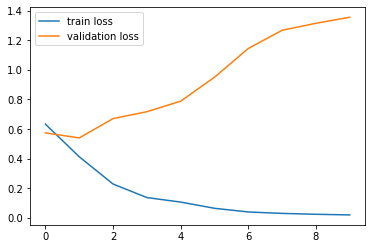

In [33]:
import matplotlib.pyplot as plt
import numpy as np

iterarions = [i for i in range(10)]
xpoints = np.array(iterarions)
train_ypoints = np.array(history["train_loss"])
val_ypoints = np.array(history["val_loss"])

plt.plot(iterarions, train_ypoints, label = "train loss")
plt.plot(iterarions, val_ypoints, label = "validation loss")
plt.legend()
plt.show()

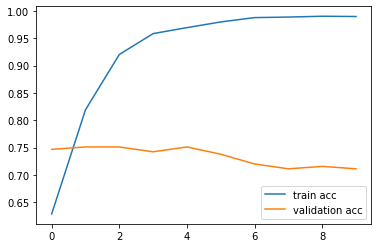

In [34]:
import matplotlib.pyplot as plt
import numpy as np

iterarions = [i for i in range(10)]
xpoints = np.array(iterarions)
train_ypoints = np.array(history["train_acc"])
val_ypoints = np.array(history["val_acc"])

plt.plot(iterarions, train_ypoints, label = "train acc")
plt.plot(iterarions, val_ypoints, label = "validation acc")
plt.legend()
plt.show()


**<font color=red> Complete function</font>**

In [35]:
def predict(model, comments, tokenizer, max_len=128, batch_size=32):
    data_loader = create_data_loader(comments, None, tokenizer, max_len, batch_size, None)
    
    predictions = []
    prediction_probs = []

    
    model.eval()
    with torch.no_grad():
        for dl in tqdm(data_loader, position=0):

            # Define input_ids, attention_mask, token_type_ids
            ##############################################################################################
            #                                       Your Code                                            #
            ##############################################################################################
            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']
            
            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            
            # compute predicted outputs by passing inputs to the model
            ##############################################################################################
            #                                       Your Code                                            #
            ##############################################################################################
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)
            # convert output probabilities to predicted class
            ##############################################################################################
            #                                       Your Code                                            #
            ##############################################################################################
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds)
            prediction_probs.extend(F.softmax(outputs, dim=1))

    predictions = torch.stack(predictions).cpu().detach().numpy()
    prediction_probs = torch.stack(prediction_probs).cpu().detach().numpy()

    return predictions, prediction_probs

In [36]:
test_comments = test['comment'].to_numpy()
preds, probs = predict(pt_model, test_comments, tokenizer, max_len=128)

print(preds.shape, probs.shape)

  0%|          | 0/8 [00:00<?, ?it/s]

<class 'torch.Tensor'>
tensor([[-0.5397,  0.9971, -0.8262,  ..., -0.9400,  0.6882, -0.3887],
        [-0.7155,  0.9767, -0.8576,  ..., -0.7841,  0.5919,  0.7095],
        [ 0.4905,  0.9273,  0.8241,  ...,  0.9015, -0.7864, -0.0895],
        ...,
        [-0.4293,  0.8832, -0.9012,  ..., -0.8577,  0.5271, -0.0243],
        [-0.3067,  1.0000, -0.3072,  ..., -0.7203,  0.4499, -0.7601],
        [-0.5749, -0.8885, -0.9168,  ..., -0.8994,  0.3939,  0.6602]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[ 0.5766,  0.9697,  0.7474,  ...,  0.8574, -0.8210, -0.0675],
        [ 0.6546,  1.0000,  0.9599,  ...,  0.8036, -0.4736, -0.8428],
        [-0.0221,  1.0000, -0.3561,  ..., -0.4641,  0.4911, -0.6556],
        ...,
        [-0.5436,  0.9486, -0.9064,  ..., -0.9188,  0.1940,  0.0546],
        [ 0.6469,  0.9855,  0.7892,  ...,  0.8926, -0.8726, -0.1249],
        [ 0.0672,  0.8829, -0.5460,  ..., -0.5072,  0.0400, -0.2964]],
       device='cuda:0')
<class 'torch.Tensor'>
tensor([[-0.656

**<font color=red> Evaluate Your Model using f1-score & Precision & Recall</font>**

In [37]:
##############################################################################################
#                                       Your Code                                            #
##############################################################################################
from sklearn.metrics import classification_report

y_test, y_pred = [label_list.index(label) for label in test['label'].values], preds

print(f'F1: {f1_score(y_test, y_pred, average="weighted")}')
print()
print(classification_report(y_test, y_pred, target_names=label_list))

F1: 0.7358478483606556

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       125
           1       0.73      0.76      0.74       125

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250

